# Matplotlib Part 3: Advanced Techniques

This notebook dives into advanced features of Matplotlib, including creating custom styles, plotting shapes and 3D figures, and deeper integration with other libraries. These techniques are key for creating publication-quality and highly customized visualizations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Creating Custom Styles

Matplotlib has a variety of built-in styles to change the look and feel of your plots. You can see the available styles with `plt.style.available`.

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


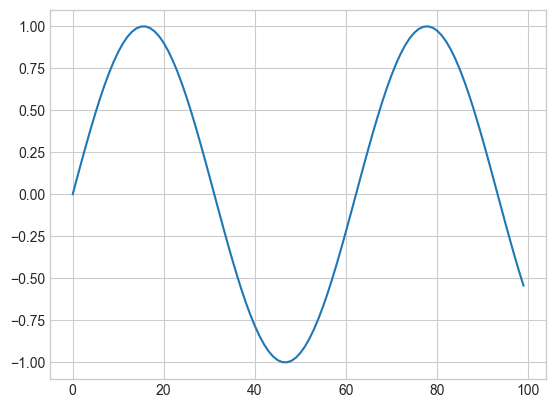

In [3]:
# Use a specific style for all subsequent plots
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots()
ax.plot(np.sin(np.linspace(0, 10, 100)))
plt.show()

You can also create your own `.mplstyle` files for fully custom themes.

## Adding Shapes (Patches)

Matplotlib's `patches` module allows you to add shapes like rectangles, circles, and arrows to your plots.

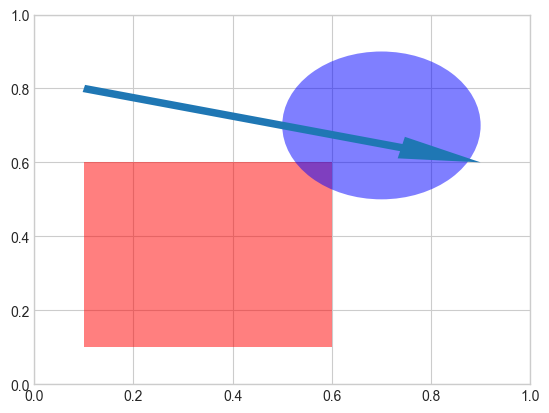

In [4]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

# Add a rectangle
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.5, 0.5, facecolor='red', alpha=0.5))

# Add a circle
ax.add_patch(patches.Circle((0.7, 0.7), 0.2, facecolor='blue', alpha=0.5))

# Add an arrow
ax.add_patch(patches.Arrow(0.1, 0.8, 0.8, -0.2, width=0.1))

plt.show()

## Color Maps

Color maps are essential for visualizing 2D data, where color represents a third dimension.

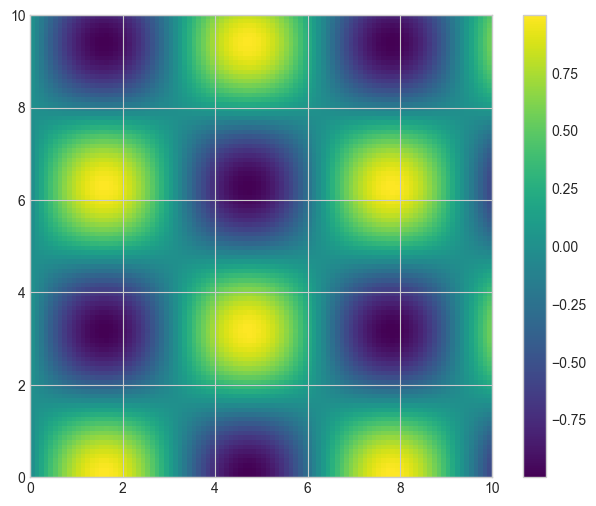

In [5]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(Z, cmap='viridis', extent=[0, 10, 0, 10], origin='lower')

# Add a colorbar
fig.colorbar(im, ax=ax)

plt.show()

## 3D Plots

For 3D plotting, you need to create a subplot with a `projection='3d'`.

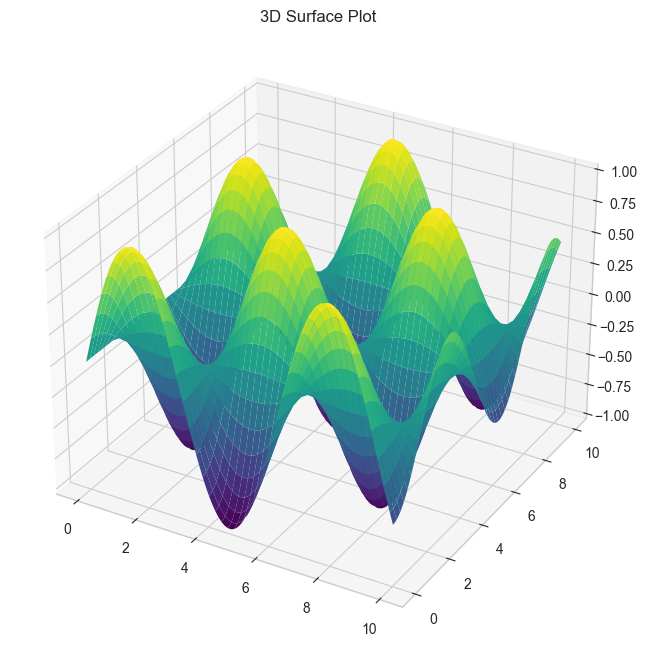

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create data for a 3D surface plot
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_title('3D Surface Plot')
plt.show()

## Interactive Navigation

In a Jupyter environment, you can use the magic command `%matplotlib notebook` to get interactive plots with panning, zooming, and rotation (for 3D plots).

In [7]:
# %matplotlib notebook
# # NOTE: This must be in its own cell and is commented out 
# # because it changes the backend for the rest of the notebook.
# # To use it, uncomment and run in a new notebook.

# fig, ax = plt.subplots()
# ax.plot(np.random.rand(50))
# plt.show()

## Integrating with Pandas DataFrames

Pandas has a built-in `.plot()` method that uses Matplotlib under the hood. You can also pass DataFrame columns directly to Matplotlib functions.

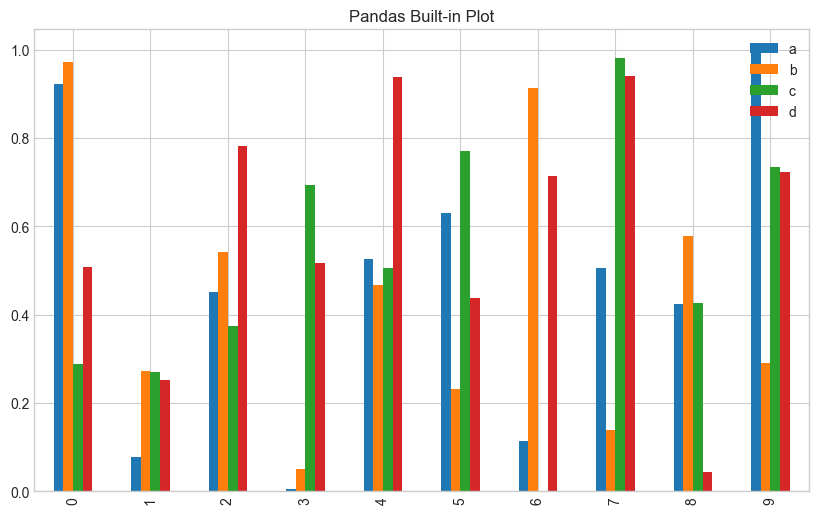

In [8]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

# Using the built-in plot method
df.plot(kind='bar', figsize=(10, 6))
plt.title('Pandas Built-in Plot')
plt.show()

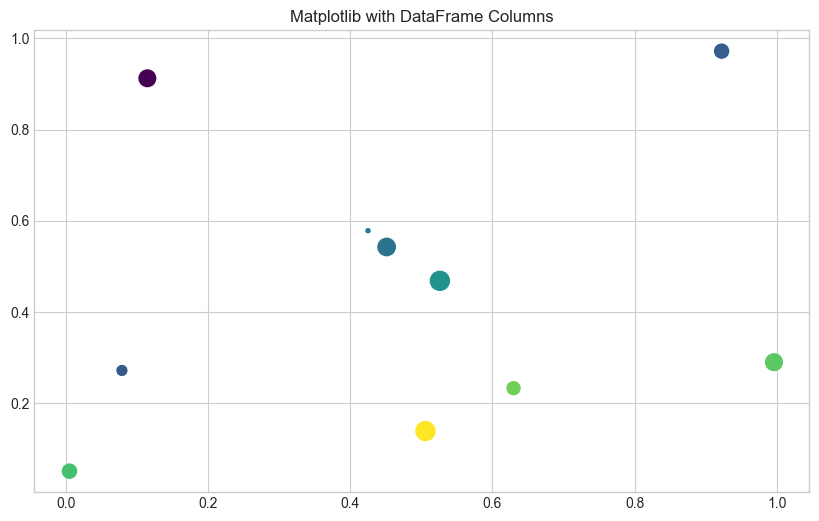

In [9]:
# Using Matplotlib directly with DataFrame data
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['a'], df['b'], c=df['c'], s=df['d']*200, cmap='viridis')
ax.set_title('Matplotlib with DataFrame Columns')
plt.show()

## Custom Legends and Colorbars

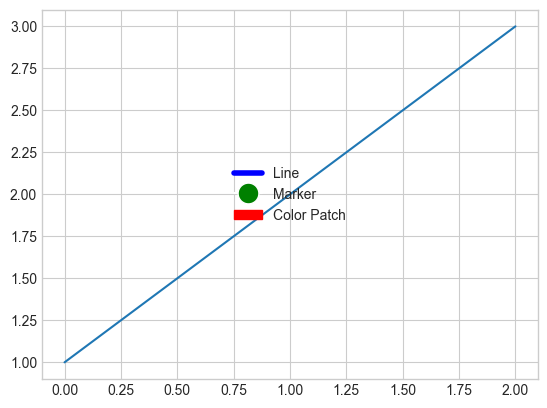

In [10]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()
ax.plot([1, 2, 3])

# Create custom legend handles
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Line'),
                   Line2D([0], [0], marker='o', color='w',
                          label='Marker', markerfacecolor='g', markersize=15),
                   patches.Patch(facecolor='red', edgecolor='r',
                                 label='Color Patch')]

ax.legend(handles=legend_elements, loc='center')
plt.show()